In [1]:
#!pip install transformers

In [2]:
from skimage import color, io, util, filters , morphology
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale

## Nomor 1

(328, 383, 3)


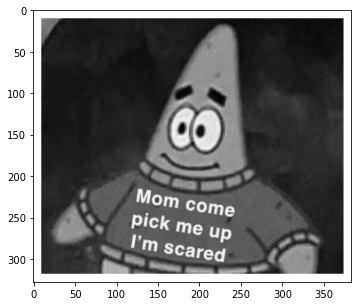

In [3]:
# pilmore = 'RGB' mengedrop data berhubungan dengan transparency
ori_img = io.imread('./baby-patrick.png', pilmode = 'RGB')
print(ori_img.shape)
plt.figure(figsize =(10 , 5))
plt.imshow(ori_img)
plt.show()

### 1.a. Negative

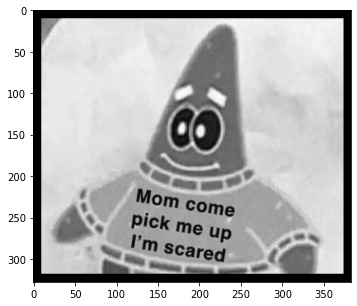

In [4]:
# Negative Image
neg_img = 255 - ori_img

plt.figure(figsize=(10,5))
plt.imshow(neg_img)
plt.show()

Text(0.5, 1.0, 'Negative')

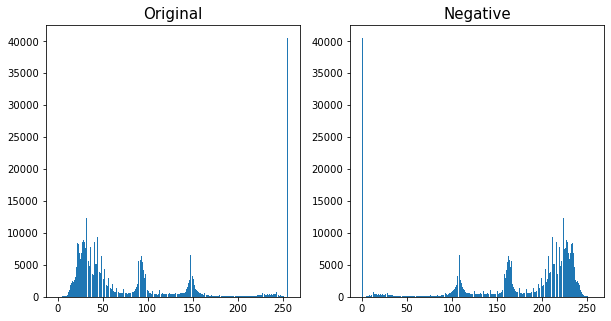

In [5]:
plt.figure(figsize=(10,5))

img_flat = util.img_as_ubyte(ori_img).flatten()
plt.subplot(1,2,1); plt.hist(img_flat, 256, range=(0, 256))
plt.title('Original', fontsize=15) 

neg_flat = util.img_as_ubyte(neg_img).flatten()
plt.subplot(1,2,2); plt.hist(neg_flat, 256, range=(0, 256))
plt.title('Negative', fontsize=15) 

### 1.b. Log Transform

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


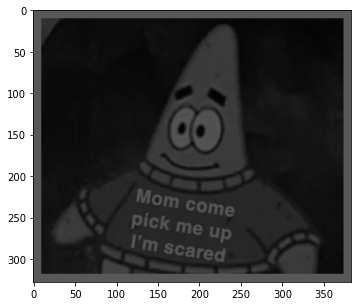

In [21]:
ori_img_tf = ori_img / 255
c = 0.5
log_img = c * np.log(1+(ori_img_tf))

plt.figure(figsize=(10,5))
plt.imshow(log_img)
plt.show()

Text(0.5, 1.0, 'Log Transform')

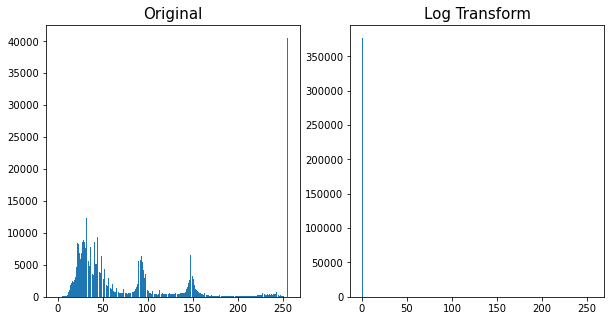

In [24]:
plt.figure(figsize=(10,5))

img_flat = util.img_as_ubyte(ori_img).flatten()
plt.subplot(1,2,1); plt.hist(img_flat, 256, range=(0, 256))
plt.title('Original', fontsize=15)

log_flat = util.img_as_ubyte(log_img).flatten()
plt.subplot(1,2,2); plt.hist(log_flat, 256, range=(0, 256))
plt.title('Log Transform', fontsize=15) 

### 1.c. Gamma Transform

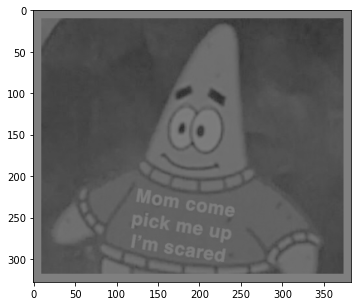

In [8]:
c_gamma = 0.5
p_gamma = 0.25
gam_img = c_gamma * (ori_img_tf**p_gamma)

plt.figure(figsize=(10,5))
plt.imshow(gam_img)
plt.show()

Text(0.5, 1.0, 'Gamma Transform')

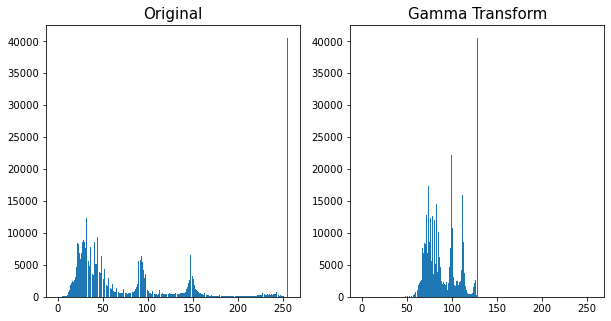

In [9]:
plt.figure(figsize=(10,5))

img_flat = util.img_as_ubyte(ori_img).flatten()
plt.subplot(1,2,1); plt.hist(img_flat, 256, range=(0, 256))
plt.title('Original', fontsize=15) 

gam_flat = util.img_as_ubyte(gam_img).flatten()
plt.subplot(1,2,2); plt.hist(gam_flat, 256, range=(0, 256))
plt.title('Gamma Transform', fontsize=15) 

### 1.d. Penjelasan

Ketiga metode di atas menunjukkan beberapa transformasi yang dilakukan kepada byte pada image.

**Negative** membuat urutan byte berubah dan menjadi terbalik. Ini dapat dilihat dari histogram transformasi yang merupakan histogram original yang terbalik.

**Log transform** mengubah jarak antar byte di histogram. Ini menyebabkan gambar menjadi terlihat lebih gelap ataupun lebih terang. Pada hasil transformasi, histogram terlihat lebih merapat ke kiri dibandingkan histogram original.

**Gamma transformation** bersifat hampir sama dengan log transform, akan tetapi transformasi ini juga mengubah offset dari byte pixel. Dalam hal ini, konstanta 'c_gamma' mebgubah offset dan 'p_gamma' mengubah jarak antar byte. Ini terlihat dari hasil histogram yang merapat dan di tengah.

## Nomor 2

(2000, 3000, 3)


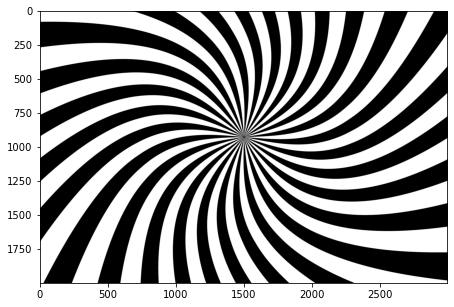

In [10]:
# pilmore = 'RGB' mengedrop data berhubungan dengan transparency
ori_img_spiral = io.imread('./spiral.png', pilmode = 'RGB')
print(ori_img_spiral.shape)
plt.figure(figsize =(10 , 5))
plt.imshow(ori_img_spiral)
plt.show()

### 2.a Edge Segmentation

(2000, 3000)


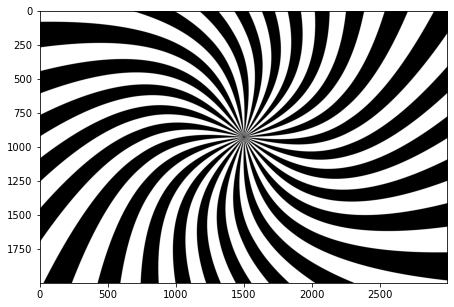

In [11]:
# Ubah menjadi grayscale
gray_img = color.rgb2gray(ori_img_spiral)
print(gray_img.shape)
plt.figure(figsize =(10 , 5))
plt.imshow(gray_img, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Sobel')

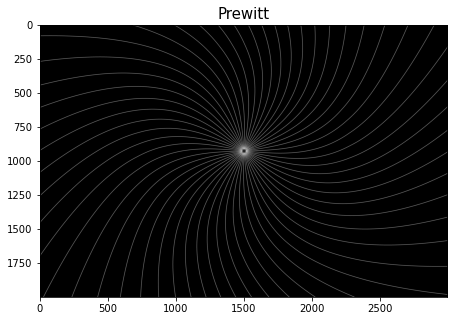

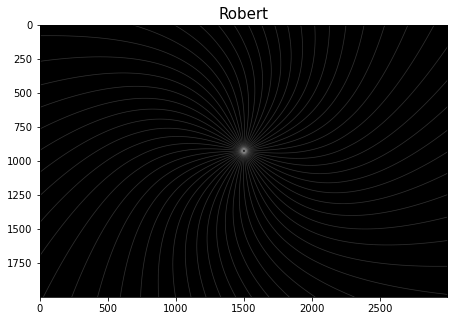

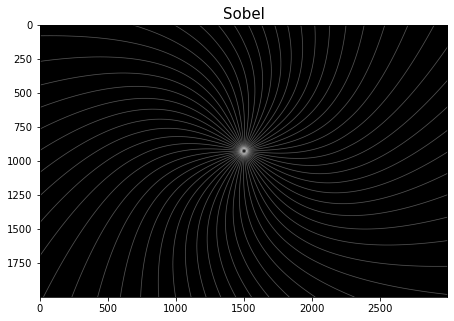

In [12]:
prewitt_img = util.img_as_ubyte(filters.prewitt(gray_img))
bob_img = util.img_as_ubyte(filters.roberts(gray_img))
sob_img = util.img_as_ubyte(filters.sobel(gray_img))

plt.figure(figsize=(10,5))
plt.imshow(prewitt_img, cmap='gray')
plt.title('Prewitt', fontsize=15) 

plt.figure(figsize=(10,5))
plt.imshow(bob_img, cmap='gray')
plt.title('Robert', fontsize=15) 

plt.figure(figsize=(10,5))
plt.imshow(sob_img, cmap='gray')
plt.title('Sobel', fontsize=15) 

### 2.b. Perbedaan masing-masing edge detection

**Prewitt** membuat edge yang cukup terlihat oleh mata.

**Robert** membuat edge yang lebih tipis dibandingkan dengan prewitt.

**Sobel** membuat edge yang cukup mirip dengan Prewitt

Semua penjelasan berdasarkan hasil penerapan metode edge detection pada spiral. Gambar lain dapat menunjukan hal lain dan memberi informasi lebih dalam mengenai masing-asing metode.

### 2.c. Gaussian Filtering

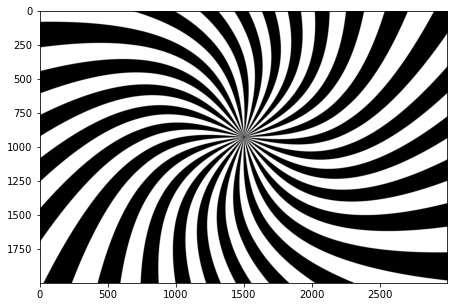

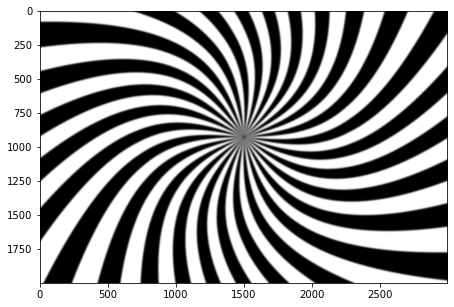

In [13]:
fil_gauss = util.img_as_ubyte(filters.gaussian(gray_img, sigma=1))
plt.figure(figsize=(10, 5))
plt.imshow(fil_gauss, cmap='gray', vmin=0, vmax=255)

fil_gauss_five = util.img_as_ubyte(filters.gaussian(gray_img, sigma=5))
plt.figure(figsize=(10, 5))
plt.imshow(fil_gauss_five, cmap='gray', vmin=0, vmax=255)

### 2.d. Gaussian Filtering Edge Detection

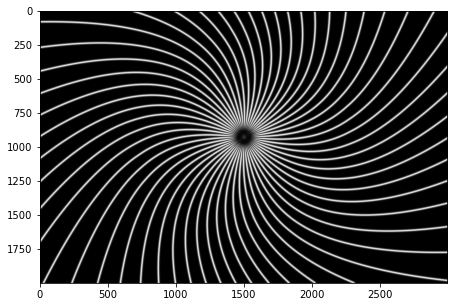

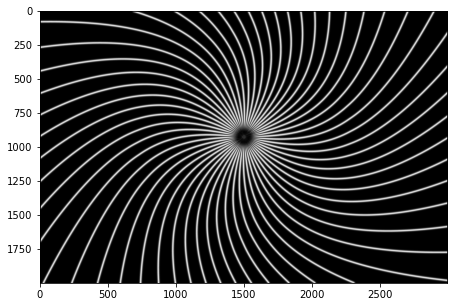

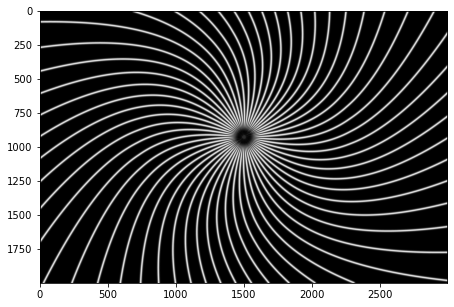

In [14]:
prewitt_img_gauss = util.img_as_ubyte(filters.prewitt(fil_gauss_five))
bob_img_gauss = util.img_as_ubyte(filters.roberts(fil_gauss_five))
sob_img_gauss = util.img_as_ubyte(filters.sobel(fil_gauss_five))

plt.figure(figsize=(10,5))
plt.imshow(prewitt_img_gauss, cmap='gray')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(bob_img_gauss, cmap='gray')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(sob_img_gauss, cmap='gray')
plt.show()

### 2.e. Kemiripan

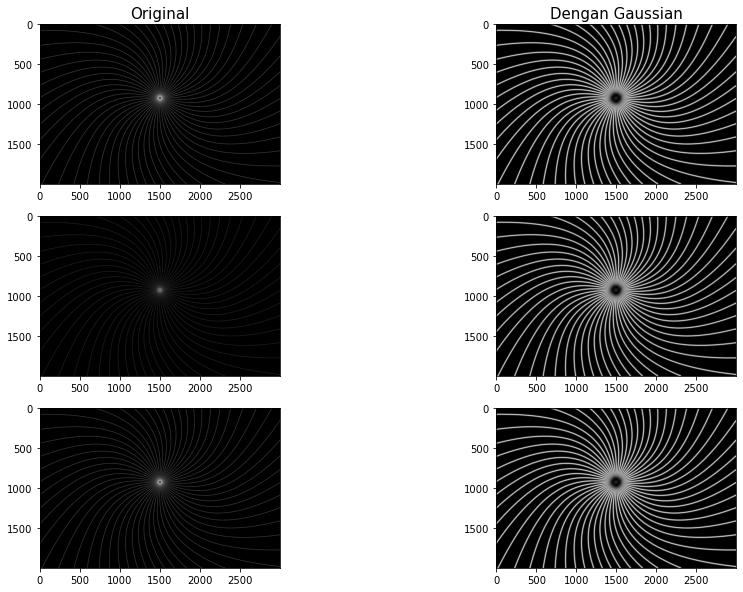

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(3,2,1); plt.imshow(prewitt_img, cmap='gray')
plt.title('Original', fontsize=15)

plt.subplot(3,2,2); plt.imshow(prewitt_img_gauss, cmap='gray')
plt.title('Dengan Gaussian', fontsize=15) 

plt.subplot(3,2,3); plt.imshow(bob_img, cmap='gray')

plt.subplot(3,2,4); plt.imshow(bob_img_gauss, cmap='gray')

plt.subplot(3,2,5); plt.imshow(sob_img, cmap='gray')

plt.subplot(3,2,6); plt.imshow(sob_img_gauss, cmap='gray')

Hasil gaussian filter sangat berbeda dari yang tidak difilter. Sekarang semua hasil edge detection memiliki hasil yang hampir sama. Semuanya terlihat memiliki tebal yang sama dan juga lebih tebal dari hasil edge detection pada gambar original.

## Nomor 3

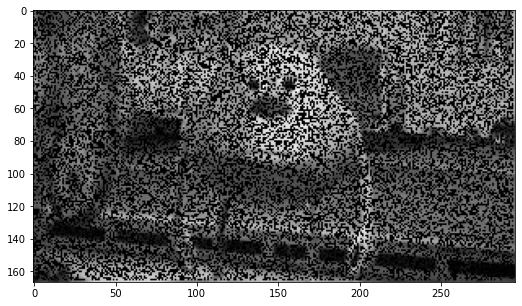

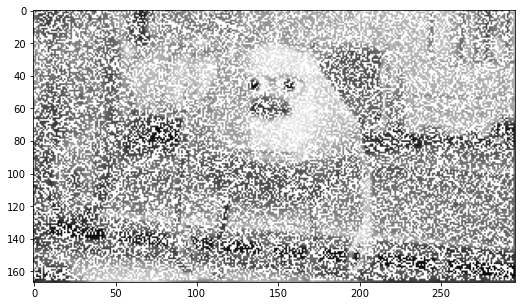

In [16]:
# pilmore = 'RGB' mengedrop data berhubungan dengan transparency
mike_image_one = color.rgb2gray(io.imread('./noisy_mike_1.jpg', pilmode = 'RGB'))
mike_image_two = color.rgb2gray(io.imread('./noisy_mike_2.jpg', pilmode = 'RGB'))
plt.figure(figsize =(10 , 5))
plt.imshow(mike_image_one, cmap='gray')
plt.show()
plt.figure(figsize =(10 , 5))
plt.imshow(mike_image_two, cmap='gray')
plt.show()

### 3.a. Minimum Filter

C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\596351906.py:1: FutureWarning: `selem` is a deprecated argument name for `minimum`. It will be removed in version 1.0. Please use `footprint` instead.
  min_one = filters.rank.minimum(mike_image_one, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\596351906.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  min_one = filters.rank.minimum(mike_image_one, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\596351906.py:2: FutureWarning: `selem` is a deprecated argument name for `minimum`. It will be removed in version 1.0. Please use `footprint` instead.
  min_two = filters.rank.minimum(mike_image_two, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\596351906.py:2: UserWarning: Possible precision loss converting image o

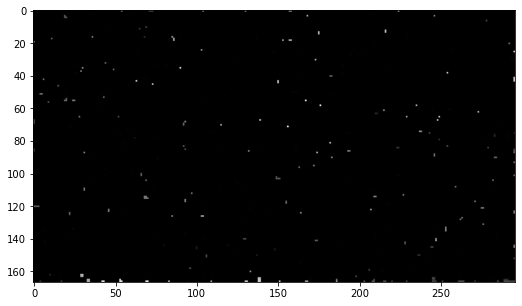

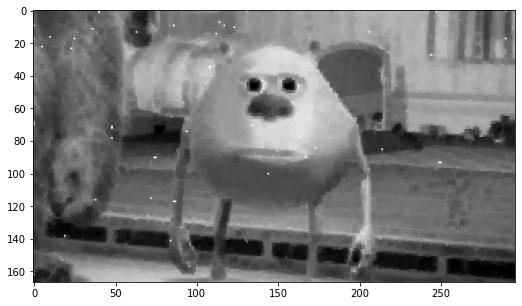

In [17]:
min_one = filters.rank.minimum(mike_image_one, selem = morphology.square(3))
min_two = filters.rank.minimum(mike_image_two, selem = morphology.square(3))

plt.figure(figsize =(10 , 5))
plt.imshow(min_one, cmap='gray')
plt.show()
plt.figure(figsize =(10 , 5))
plt.imshow(min_two, cmap='gray')
plt.show()

### 3.b. Maximum Filter

C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1005966153.py:1: FutureWarning: `selem` is a deprecated argument name for `maximum`. It will be removed in version 1.0. Please use `footprint` instead.
  max_one = filters.rank.maximum(mike_image_one, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1005966153.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  max_one = filters.rank.maximum(mike_image_one, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1005966153.py:2: FutureWarning: `selem` is a deprecated argument name for `maximum`. It will be removed in version 1.0. Please use `footprint` instead.
  max_two = filters.rank.maximum(mike_image_two, selem = morphology.square(3))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1005966153.py:2: UserWarning: Possible precision loss converting ima

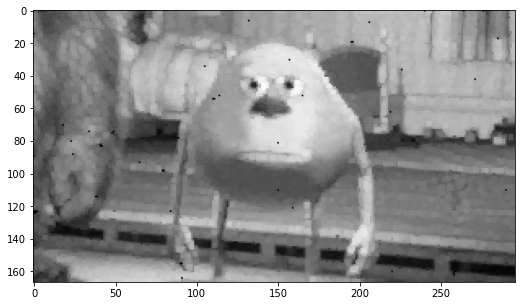

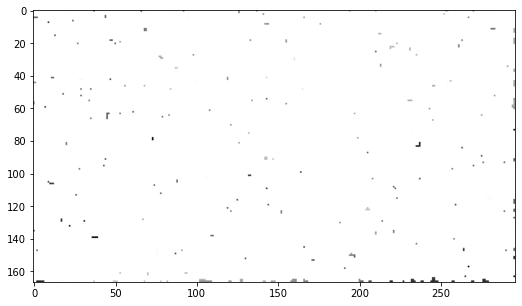

In [18]:
max_one = filters.rank.maximum(mike_image_one, selem = morphology.square(3))
max_two = filters.rank.maximum(mike_image_two, selem = morphology.square(3))

plt.figure(figsize =(10 , 5))
plt.imshow(max_one, cmap='gray')
plt.show()
plt.figure(figsize =(10 , 5))
plt.imshow(max_two, cmap='gray')
plt.show()

### 3.c. Kesimpulan

Kedua citra adalah gambar yang sama dengan tipe noise yang berbeda. Gambar satu memiliki noise berwarna hitam sementara gambar dua memiliki noise berwarna putih.

Min filter terlihat bagus pada gambar dua dan membuat gambar satu menjadi hitam. Ini karena kernel memilih pixel dengan intensitas terendah dari semua *adjacent pixel*. Dengan noise putih, gambar dua dapat menghapus semua noisenya karena noise putih memiliki intensitas besar dan hilang jika kita memrioritaskan intensitas kecil. Sementara itu untuk gambar satu, karena pixel hitam memiliki intensitas 0, filter memrioritaskan noise dibandingkan gambar asli sehingga gambar menjadi hitam.

Max filter terlihat bagus di gambar satu dan membuat gambar dua menjadi putih. Max filter berfungsi terbalik dari min filter di mana max filter memilih pixel dengan intensitas tertinggi dari semua *adjacent pixel*. Dengan noise hitam, gambar satu terlihat lebih jelas ketika difilter karena filter memrioritaskan pixel tertinggi dan pixel hitam memiliki intensitas 0. Sebaliknya, untuk gambar dua yang memiliki noise putih, piksel putih diprioritaskan sehingga noise diambil sebagai prioritas dan membuat gambar menjadi putih.

Dari hasil ini bisa dibilang bahwa min filter terlihat bagus untuk gambar dengan noise yang putih, sementara max filter terlihat bagus untuk gambar dengan noise yang hitam.

### 3.d. apa yang cocok digunakan

Seperti yang sudah dijelaskan di bagian sebelumnya, min filter terlihat bagus untuk gambar dengan noise yang putih, sementara max filter terlihat bagus untuk gambar dengan noise yang hitam. Pada prakteknya image yang berwarna mungkin tidak akan memiliki noise sebanyak image yang diberikan untuk dicoba. Untuk itu, mari kita coba filtering pada image asli

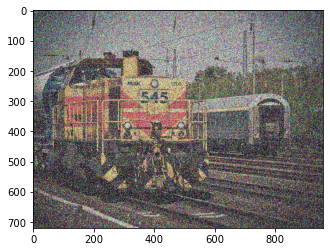

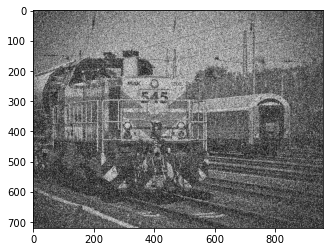

In [19]:
train_img = io.imread('./Example_image.jpg', pilmode = 'RGB')
train_img_gray = color.rgb2gray(train_img)

plt.imshow(train_img)
plt.show()
plt.imshow(train_img_gray, cmap='gray')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1091713734.py:1: FutureWarning: `selem` is a deprecated argument name for `minimum`. It will be removed in version 1.0. Please use `footprint` instead.
  min_train = filters.rank.minimum(train_img_gray, selem = morphology.square(2))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1091713734.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  min_train = filters.rank.minimum(train_img_gray, selem = morphology.square(2))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1091713734.py:2: FutureWarning: `selem` is a deprecated argument name for `maximum`. It will be removed in version 1.0. Please use `footprint` instead.
  max_train = filters.rank.maximum(train_img_gray, selem = morphology.square(2))
C:\Users\DELL\AppData\Local\Temp\ipykernel_3260\1091713734.py:2: UserWarning: Possible precision loss converti

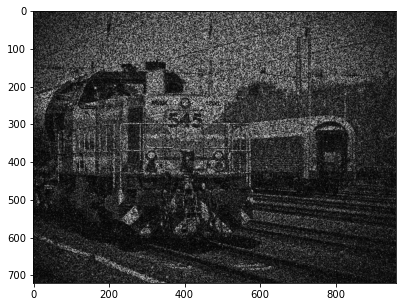

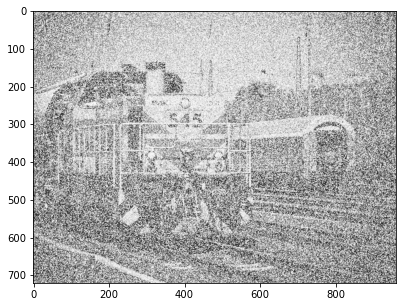

In [20]:
min_train = filters.rank.minimum(train_img_gray, selem = morphology.square(2))
max_train = filters.rank.maximum(train_img_gray, selem = morphology.square(2))

plt.figure(figsize =(10 , 5))
plt.imshow(min_train, cmap='gray')
plt.show()
plt.figure(figsize =(10 , 5))
plt.imshow(max_train, cmap='gray')
plt.show()

Di lihat dari hasil di atas kedua hasil filter terlihat lebih buruk dibandingkan image yang belum difilter. Akan tetapi, ada beberapa perbedaan yang terlihat. Min filter terlihat lebih gelap akan tetapi ada banyak informasi yang masih terseimpan dalam image. Max filter terlihat membuat gambar menjadi kurang jelas dan ada beberapa informasi yang hilang (seperti rel kereta di background). 

Dari hasil percobaan ini, dapat disimpulkan bahwa max filter dapat memperjelas bagian-bagian dari image yang mungkin terlalu terang. Sebaliknya, min filter dapat memperjelas bagian image yang terlalu gelap.